# K-NN & MULTINOMIAL LOGISTIC REGRESSION

## Phương pháp K-NN cho phân loại đa lớp

 ## Ví dụ A.1: Phân loại đa lớp bằng K-NN

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL.DdsImagePlugin import module

# randomly generate data
N = 500 # number of training sample
d = 2 # data dimension
C = 3 # number of classes (for c = 0, 1, 2)
means = [[2, 2], [8, 3], [3, 6]] # centeroid of each class dataset
cov = [[1, 0], [0, 1]]
# generate 3 classes of datasets
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix)
X = np.concatenate((X0, X1, X2), axis = 0).T
# Generate label for data points of each class (0, 1, 2)
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

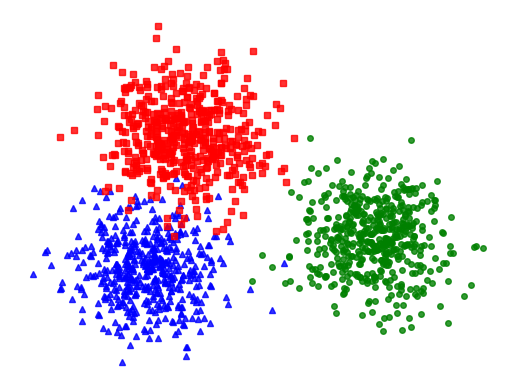

In [5]:
import matplotlib.pyplot as plt

def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    plt.plot(X0[0, :], X0[1,:], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8)
    plt.axis('off')
    plt.show()

display(X, original_label)

In [6]:
# Split data into training and test datasets

X_train = np.concatenate((X0[:400], X1[:400], X2[:400]), axis = 0)

Y_train = np.concatenate((original_label[:400], original_label[500:900],
original_label[1000:1400]), axis = 0)
X_val = np.concatenate((X0[400:], X1[400:], X2[400:]), axis = 0)
Y_val = np.concatenate((original_label[400:500], original_label[900:1000],
original_label[1400:1500]), axis = 0)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(1200, 2) (1200,) (300, 2) (300,)


In [7]:
# Function distance

# d == 1
def distance(array, value):
    array = np.array(array)
    return np.absolute(array - value)

# d >= 2

def distance(array, value):
    array = np.array(array)
    return np.linalg.norm(array - value, ord= 2, axis= np.shape(array).index(1))


In [8]:
# function highest rank

def highest_rank(arr):
    count_num = {}
    for i in arr:
        count_num[i] = arr.count(i)
    return max(count_num, key=count_num.get)

In [9]:
# function find_nearest_index

def find_nearest_index(array, value, k):
    array = np.array(array)
    distances = np.linalg.norm(array - value, ord=2, axis=1)
    return distances.argsort()[:k]

[0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 

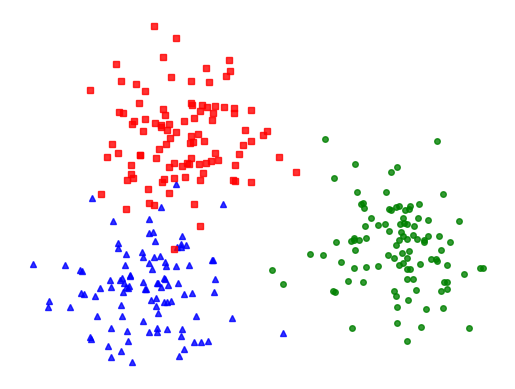

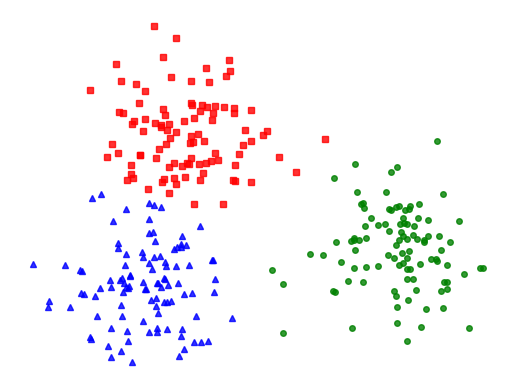

In [10]:
# function KNN

K = 20
y_pred = np.zeros(len(Y_val)).astype(int)
for j in range(len(Y_val)):
    indexes = find_nearest_index(X_train, X_val[j], K)
    y_nearest = []
    for i in range(K):
        y_nearest.append(Y_train[indexes[i] ])

    y_pred[j] = highest_rank(y_nearest)
print(y_pred)
print(Y_val)
display(X_val.T, Y_val)
display(X_val.T, y_pred)

In [22]:
# Đánh giá mô hình

from sklearn.metrics import accuracy_score, confusion_matrix

print('Accuracy:', accuracy_score(Y_val, y_pred))

print('Confusion matrix:\n', confusion_matrix(Y_val, y_pred))

Accuracy: 0.9666666666666667
Confusion matrix:
 [[97  1  2]
 [ 0 99  1]
 [ 6  0 94]]


## Ví dụ B.1

In [35]:
import numpy as np
import matplotlib.pyplot as plt
# randomly generate data
N = 500 # number of training sample
d = 2 # data dimension
C = 3 # number of classes (for c = 0, 1, 2)
means = [[2, 2], [8, 3], [3, 6]] # centeroid of each class dataset
cov = [[1, 0], [0, 1]]
# generate 3 classes of datasets
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix)
X = np.concatenate((X0, X1, X2), axis = 0).T
# extended data by add row ONES (equivalent to 1) at first place
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)

# Generate label for data points of each class (0, 1, 2)
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [36]:
# Function convert label to matrix
from scipy import sparse
def convert_labels(y, C = C):
    """
    convert 1d label to a matrix label: each column of this
    matrix coresponding to 1 element in y. In i-th column of Y,
    only one non-zeros element located in the y[i]-th position,
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

    [[1, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [37]:
# function softmax

def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax(Z):
    """
    #Compute softmax values for each sets of scores in V.
    #each column of V is a set of score.
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

# function softmax regression

def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W

In [38]:
# cost or loss function
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

# Predict that X belong to which class (1..C now indexed as 0..C-1 )
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

In [39]:
# W[-1] is the solution, W is all history of weights
eta = .05
d = X.shape[0]
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])

[[ 8.90906524 -3.28076633 -3.2897741 ]
 [-0.51341646  1.89778856 -0.3357264 ]
 [-0.60687797 -0.53661081  2.26311726]]


In [40]:
# Evaluate model
from sklearn.metrics import accuracy_score, confusion_matrix

Y_train_pred = pred(W[-1], X)


print('Accuracy train:', accuracy_score(original_label, Y_train_pred))

print('Confusion matrix train:\n', confusion_matrix(original_label, Y_train_pred))

Accuracy train: 0.9813333333333333
Confusion matrix train:
 [[489   1  10]
 [  0 497   3]
 [ 14   0 486]]


(1, 270400)
(3, 270400)


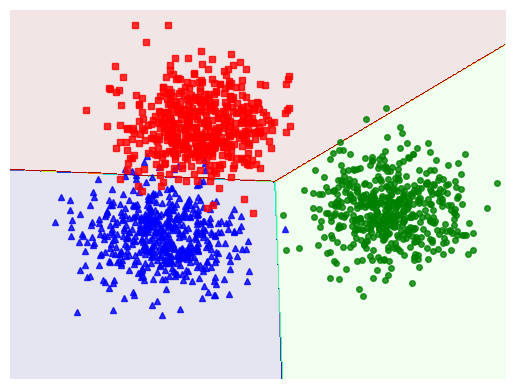

<Figure size 640x480 with 0 Axes>

In [41]:
#Visualize
xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)
print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
print(XX.shape)
Z = pred(W[-1], XX)
Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)
plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())
display(X[1:, :], original_label)
plt.savefig('ex1.png', bbox_inches='tight', dpi = 300)
plt.show()

## Ví dụ A.2 Phân loại đa lớp bằng K-NN
### Dữ liệu Iris

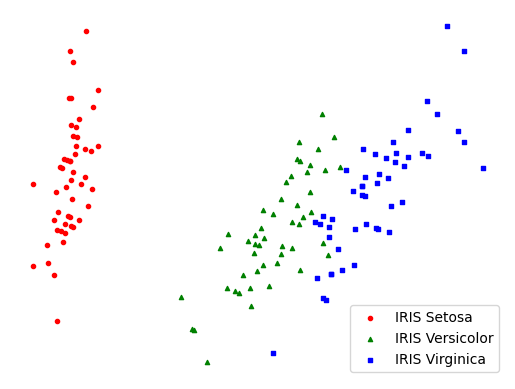

In [17]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()

X = iris.data[:, :4] # we take full 4 features
Y = iris.target

# Normalize data
X_norm = (X - X.min())/(X.max() - X.min())

# PCA

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

plt.axis("off")

plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa',
c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',
c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica',
c='blue', marker="s")

plt.legend()

plt.show()

In [48]:
# Split data into training and test datasets

from sklearn.model_selection import train_test_split

X_train =




ValueError: Found input variables with inconsistent numbers of samples: [3, 150]